# Derivations:

## Q2
Design and tests (run, sign, KS,...) of Pseudorandom number generator and use in Monte-Carlo method

Using Linear Congruence generator:

In [1]:
def random_generator(seed, number, typ): #returns number np. of ints in range 0 to m or floats in range 0 to 1
    #m = 0 to 2^32
    m=100000
    xval = seed % m
    r=[]
    for i in range(0,number):
        xval=(27*xval+10)%m
        if typ=='int':
            #xval=mini+int((xval-0)*(maxi-mini)/(m-0))
            r.append(xval)
        elif typ=='float':
            r.append(xval/m)
    return r

In [2]:
x=random_generator(107, 10, 'int')
x

[2899, 78283, 13651, 68587, 51859, 203, 5491, 48267, 3219, 86923]

In [3]:
x=random_generator(93, 10, 'float')
x

[0.02521,
 0.68077,
 0.38089,
 0.28413,
 0.67161,
 0.13357,
 0.60649,
 0.37533,
 0.13401,
 0.61837]

Kolmogorov–Smirnov test a very efficient way to determine if two samples are significantly different from each other. It is usually used to check the uniformity of random numbers. Uniformity is one of the most important properties of any random number generator and Kolmogorov–Smirnov test can be used to test it.
The Kolmogorov–Smirnov test may also be used to test whether two underlying one-dimensional probability distributions differ. It is a very efficient way to determine if two samples are significantly different from each other.

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.

To use the test for checking the uniformity of random numbers, we use the CDF (Cumulative distribution function) of U[0, 1].

Empirical CDF, Sn(x)= (number of R1, R2...Rn < x) / N array of random numbers, the random numbers must be in the range of [0, 1].

H0(Null Hypothesis): Null hypothesis assumes that the numbers are uniformly distributed between 0-1.
If we are able to reject the Null Hypothesis, this means that the numbers are not uniformly distributed between 0-1. Failure to reject the Null Hypothesis although does not necessarily mean that the numbers follow the uniform distribution.

Statistics: This is the calculated value of D, where D=|F(x)-Sn(x)|.
-> This D is compared with Dalpha where alpha is the level of significance. Alpha is defined as the probability of rejecting the null hypothesis given the null hypothesis(H0) is true. For most of the practical applications, alpha is chosen as 0.05.

p-value: This is calculated with the help of D.
-> If pvalue> alpha, we fail to reject the null hypothesis. Otherwise, we conclude that the numbers are not uniform. Ideally, the p-value should be as large as possible. For perfect uniform distribution pvalue=1 and Statisitics=0.

In [4]:
#SELECTION SORT, for Ascending order, by finding smallest numbers 
def sorting(x):
    N=len(x)
    for i in range(0,N):
        Min=x[i]
        Index=i
        #print(i) 
        for j in range(i+1,N):
            #print(j)
            if x[j]<Min:
                Min=x[j]
                Index=j
        x[Index]=x[i]
        x[i]=Min
    return x

In [5]:
#(Kolmogorov-Smirnov) K-S test
x=sorting(x)
#print(x)
N=len(x)
D_plus=[]
D_minus=[]
for i in range(0,N):
    D_plus.append((i+1)/N-x[i])
    D_minus.append(x[i]-i/N)
if max(D_plus)>max(D_minus):
    D=max(D_plus)
else:
    D=min(D_minus)
print(D)

0.31923


In [6]:
#Verification of D-statistic and equivalent p-value from K-S table
from scipy.stats import kstest
print(kstest(x,"uniform"))

KstestResult(statistic=0.31923, pvalue=0.20947864619454093)


<StemContainer object of 3 artists>

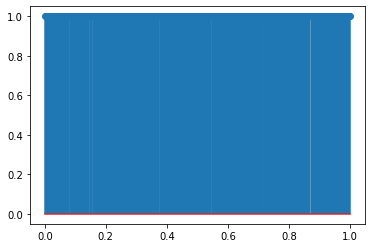

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

x=random_generator(93, 1000, 'float')
d=Counter(x)
#print(list(d.values()))
#print(x)
plt.stem(x,d.values())
    

# Using Monte-Carlo Method to Compute $\pi$ #

One method to estimate the value of $\pi$ (3.141592...) is by using the Monte Carlo method. Assuming we have a circle of radius r=1, enclosed by a 2 × 2 square. The area of the circle is $\pi r^2=\pi$, the area of the square is 4. If we divide the area of the circle, by the area of the square we get $\pi /4$.

We then generate a large number of **uniformly distributed** random points and plot them on the graph. These points can be in any position within the square i.e. between (0,0) and (1,1). If they fall within the circle, they are coloured red, otherwise they are coloured blue. We keep track of the total number of points, and the number of points that are inside the circle. If we divide the number of points within the circle, Ninner by the total number of points, Ntotal, we should get a value that is an approximation of the ratio of the areas we calculated above, $\pi/4$.

estimated Pi is 3.136 and absolute percentage error is  0.17801969276323767


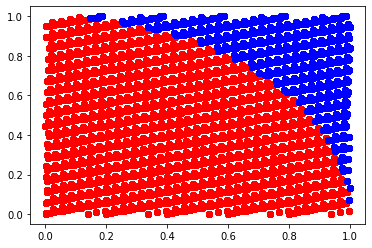

In [8]:
import numpy as np
def PI_Monte_Carlo(Ntotal,plot_result = False):
    #Ntotal = 10000
    Ninside = 0
    x=np.array(random_generator(93, Ntotal, 'float'))
    y=np.array(random_generator(95, Ntotal, 'float'))
    r = np.sqrt(x**2+y**2)
    
    inside = r < 1.0
    
    Ninside = np.sum(inside)
    Pinside = Ninside / Ntotal
    
    if plot_result:
        fig,ax = plt.subplots()
        ax.scatter(x[inside],y[inside],c='r')
        ax.scatter(x[~inside],y[~inside],c='b')
        
    return 4.0 * Pinside
pi_est = PI_Monte_Carlo(100000,plot_result=True) 
err = np.abs((pi_est-np.pi))*100/np.pi
print(f'estimated Pi is {pi_est } and absolute percentage error is ', err)

## Q3
Solve the differential equation using RK4, FDM

# Differential Equation of the Orbit
 The differential equation of the Orbit of a planet of constant mass '$\mathbf{m}$', under the Central force $\mathbf{\vec{F}=f(r)\hat{r}}$ with respect to the Origin '$\mathbf{O}$' taken at the centre of mass of star-planet system (effectively the position of the star), is given by:
$$ \mathbf{\frac{d^2u}{d\theta^2}+u=-\frac{m}{l^2u^2}f(\frac{1}{u})}$$
where, 

$\mathbf{\theta=}$ angular co-ordinate of the planet (independent; varies from $\mathbf{0}$ to $\mathbf{2\pi}$)

$\mathbf{r=}$ radial co-ordinate of the planet (positive, function of $\mathbf{\theta}$)

$\mathbf{l=mr^2\dot{\theta}=}$ angular momentum of the planet (constant)

$\mathbf{\dot{\theta}=\frac{d\theta}{dt}}$

$\mathbf{u=\frac{1}{r}}$

which is a nonhomogenous differential equation of second order whose solution gives us the equation of the orbit of the form $\mathbf{r(\theta)}$, for a given force law (power law in terms of $\mathbf{r}$) $\mathbf{f(r)=-\frac{1}{r^n}=-u^n}$ . 

For simplicity, let the planet collide with the star when it approaches the star's surface at a radius $\mathbf{r=0.001}$. Also, we have assumed the constant term $\mathbf{\frac{-m}{l^2}=-1}$. Hence, the differential equation reduces to:
$$ \mathbf{\frac{d^2u}{d\theta^2}+u=-\frac{1}{u^2}f(\frac{1}{u})}$$
Let, initially at $\mathbf{\theta=0}$ rad, initial distance of the planet be $\mathbf{r(0)=1}$ from '$\mathbf{O}$' and initial velocity (tangential) $\mathbf{\frac{dr(\theta)}{d\theta}|_{\theta=0}=-0.1}$

Therefore, $$\mathbf{\frac{du(\theta)}{d\theta}=\frac{d}{d\theta}(\frac{1}{r(\theta)})=-\frac{1}{r(\theta)^2}\frac{dr(\theta)}{d\theta}}$$

Then, the initial conditions for the differential equation of the orbit at $\mathbf{\theta=0}$ rad will be: $\mathbf{u(0)=\frac{1}{r(0)}=1}$ and $\mathbf{\frac{du(\theta)}{d\theta}|_{\theta=0}=-\frac{1}{r(0)^2}(\frac{dr(\theta)}{d\theta}|_{\theta=0})=0.1}$. 

Converting the second order differential equation into two first order simultaneous equations:

Let, $\mathbf{\frac{du}{d\theta}=v}$. Then, $ \mathbf{\frac{d^2u}{d\theta^2}=-u-\frac{1}{u^2}f(\frac{1}{u})=\frac{dv}{d\theta}}$

Thus, the two first order simultaneous equations are:
$$\mathbf{\frac{du}{d\theta}=v=f_1}$$
$$\mathbf{\frac{dv}{d\theta}=-u-\frac{1}{u^2}f(\frac{1}{u})=f_2}$$

So, the initial conditions for these first order differential equations are: $\mathbf{u(0)=\frac{1}{r(0)}=1}$ and  $\mathbf{v(0)=\frac{du(\theta)}{d\theta}|_{\theta=0}=0.1}$

Now, we can use 4th order RK method to solve this second order differential equation and plot the orbit for different cases of the force law.

In [9]:
def force(n,u):
    return -u**n

In [10]:
def f1(v):
    return v

In [11]:
def f2(n,u):
    return -u-(force(n,u)/u**2)

In [12]:
def RK4(n,h,u,v):
    u_v=[]
    k1=h*f1(v)
   
    l1=h*f2(n,u)
    k2=h*f1(v+l1/2)
    l2=h*f2(n,u+k1/2)
    k3=h*f1(v+l2/2)
    l3=h*f2(n,u+k2/2)
    k4=h*f1(v+l3)
    l4=h*f2(n,u+k3)
    k=(k1+2*k2+2*k3+k4)/6
    l=(l1+2*l2+2*l3+l4)/6
    u_v.append(u+k)
    u_v.append(v+l)
    return u_v

In [13]:
def X_Y(n):
    u=1
    v=0.1
    theta=0
    h=0.1
    X=[]
    Y=[]
    T=[]
    
    X.append((1/u)*np.cos(theta))
    Y.append((1/u)*np.sin(theta))
    
    err=0
    t = np.arange(theta,theta+20*3.14,h)
    
    for i in t:
        T.append(i)
        u_v=[]
        u_v=RK4(n,h,u,v)
        u=u_v[0]
        v=u_v[1]
        
        r=1/u
        x=r*np.cos(i)
        
        X.append(x)
        y=r*np.sin(i)
        
        Y.append(y)
        if abs(r)<0.001 or abs(r)>10:
            err_theta=i
            err_r=r
            err=1
            break
   
    #if err==1:
        #t = np.arange(-err_theta,0,h)
    
        #for i in t:
            #T.append(i)
            #u_v=[]
            #u_v=RK4(n,h,u,v)
            #u=u_v[0]
            #v=u_v[1]
            #V.append(v)
            #r=1/u
            #x=r*np.cos(i)
            
            #X.append(x)
            #y=r*np.sin(i)
            #print(y)
            #Y.append(y)
            #if abs(r)<0.001:
                #err_theta=i
                #err_r=r
                #err=1
                #break
    plt.plot(X,Y)
        

## Case-1: Inverse square law
When the force varies as the inverse 2nd power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^2}\hat{r}}$

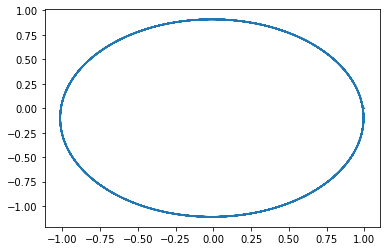

In [14]:
n=2
X_Y(n)

## Case-2:
When the force varies as the inverse 3rd power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^3}\hat{r}}$

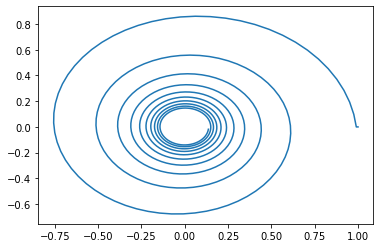

In [15]:
n=3
X_Y(n)

## Case-3:
When the force varies as the inverse 4th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^4}\hat{r}}$

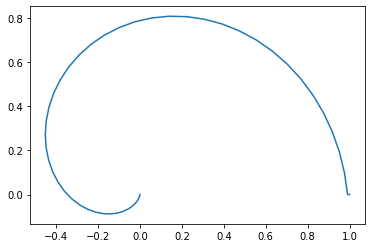

In [16]:
n=4
X_Y(n)

## Case-4:
When the force varies as the inverse 5th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^5}\hat{r}}$

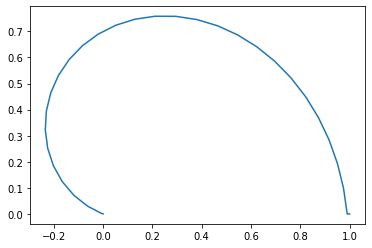

In [17]:
n=5
X_Y(n)

## Case-5:
When the force varies as the inverse 6th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^6}\hat{r}}$

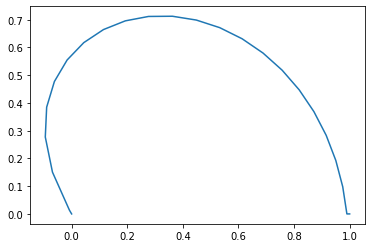

In [18]:
n=6
X_Y(n)

## Case-6:
When the force varies as the inverse 7th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^7}\hat{r}}$

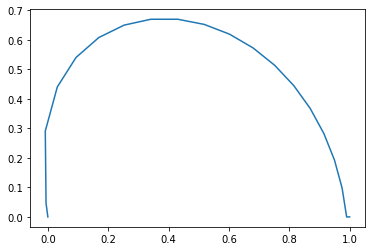

In [19]:
n=7
X_Y(n)

## Case-7:
When the force varies as the inverse 8th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^8}\hat{r}}$

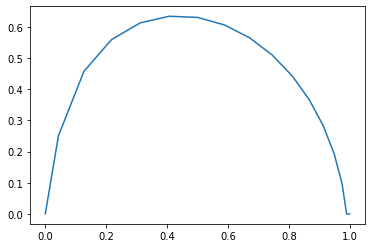

In [20]:
n=8
X_Y(n)